## Phase 4.36

# Recommendation Systems

## Objectives
- Look at different <a href='#types'>Types of Recommendation Systems</a>.
- <a href='#write'>Write a Recommendation System</a> using `Surprise`.

<a id='types'></a>
# Types of Recommendation Systems

## Non-Personalized

> Grouping items based on **overall popularity**.

<img src='./images/nonpersonalized.png' width=500>

- Top-rated items
- Most-bought / watched / consumed content
- Items that give companies highest ROI


- *Easy and self-explanatory*
    - *Same recommendations for everyone*


## Content-Based

> Grouping items based on **item features**.

***Imagine a Dataset like this:***

| item_id | feature1 | feature2 | feature3 | feature4 |
| ---     | --- | ---|---| ---|
| 0 | 0.0  |  0.0| 1.0| 0.0 |
| 1 | 1.0  |  1.0| 0.0| 1.0 |

- Makes recommendations based on an item's **features**.
    - *You shopped for houseplants! We think you might like products like {plants, soil, plant supplements}*

## Collaborative Filtering

> Grouping items based on **similar customers / items**.
> - *User-to-User / Item-to-Item*

***Imagine a Dataset like this:***

| customer_id | item_0_stars | item_1_stars | item_2_stars | item_3_stars |
| ---         | ---    | ---    |---     | ---    |
| 0           | 0    |  2   | 5    | 1    |
| 1           | 4    |  5   | 2    | 4    |

- When a customer is brand new (no history), this typically begins with a non-personalized system.
    - *Check out our most popular stuff! It's so popular! You'll love it! Probably.*
    
    
- Once a customer shows interest in a particular product, their preference and association with that product gets stored.
    - *I see you liked product_X! People who liked product_X very often also like product_Y! You'll love it! Probably.*
    
    
- *The more data a customer has stored, the more tailored the recommendations become.*
    - *Buying a product gives us some (small) idea of what you like to buy!*
    - *Buying lots of products gives us a good idea as to what you like to buy.*
        - *Binning customers ... Clustering!*

---

- Content-Based and Customer-Based systems are based on the similarity of one item / customer to another.


- Specifically, a Collaborative Filtering Recommendation System will use matrix decomposition into component pieces. These componend pieces can be thought of latent / inherent features of the items and users.

<img src='./images/matrixfactorization.png'>

> More on Matrix Factorization (Google's Recommendation Systems) and an interactive Colab Notebook: 
>
> https://developers.google.com/machine-learning/recommendation/collaborative/matrix
>
> https://colab.research.google.com/github/google/eng-edu/blob/main/ml/recommendation-systems/recommendation-systems.ipynb?utm_source=ss-recommendation-systems&utm_campaign=colab-external&utm_medium=referral&utm_content=recommendation-systems#scrollTo=8vRUh2Mzo4s1

---

## Common Similarity Metrics

- Euclidean Distance
    - Simple distance metric based on two points represented in vector space.
        - $\sqrt{\sum (q_i - p_i)^2}$
- Jaccard Index
    - A comparison of two sample sets.
        - $\large \frac{Similarity}{Joined Sets}$ (or formally $\large \frac{|A \cap B|}{|A \cup B|}$)
- Pearson Correlation
    - Measures the *magnitude of association* between two samples.
        - $\large \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum (x_i - \overline{x})^2 \sum (y_i - \overline{y})^2}}$
            - $x_i$ : Value $i$ in the x-sample.
            - $\overline{x}$ : Mean of the values in the x-sample.

<a id='write'></a>
# Writing a Recommendation System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting plot style.
plt.style.use('seaborn-talk')

In [3]:
# Data is a subset (100k-samples) from the dataset here:
# https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv
df = pd.read_csv('./data/ratings.csv', index_col=0)
df.shape

(100000, 4)

In [4]:
df

,userId,movieId,rating,timestamp
8332275,85912,47044,3.0,1343124797
14064992,146155,908,3.5,1310362739
16493606,171469,1408,3.5,1119092725
16264251,169016,3362,4.0,1169756148
18318393,190098,2126,3.5,1267547039
...,...,...,...,...
3413740,35504,7173,2.5,1092615836
18274042,189575,4344,3.0,1156234840
23440699,243363,4232,5.0,1009937143
7094630,73229,91450,2.0,1470608941


## Exploration

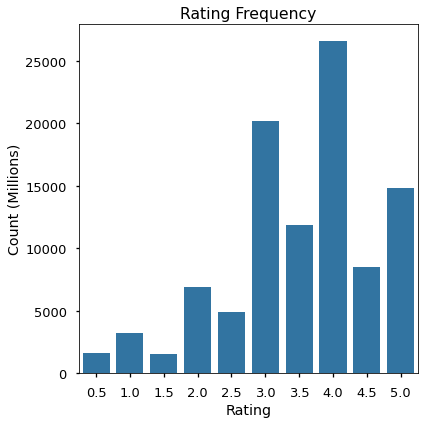

In [5]:
# Count of Ratings.
rating_counts = (df['rating']
                 .value_counts()
                 .reset_index()
                 .sort_values('index'))
rating_counts.columns = ['rating', 'count']

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x='rating', y='count', data=rating_counts, color='tab:blue', ax=ax)
ax.set(title='Rating Frequency', xlabel='Rating', ylabel='Count (Millions)')
fig.tight_layout()

In [6]:
def show_stats_of(series):
    """Print summary info about a given series."""
    
    n_ = series.shape[0]
    mean_ = round(series.mean(), 2)
    std_ = round(series.std(), 2)
    min_ = round(series.min(), 2)
    max_ = round(series.max(), 2)


    print(f'Number of Instances:\n\t{n_}')
    print(f'{series.name.title()}:')
    print(f'\tMean:              \t{mean_}')
    print(f'\tStandard Deviation:\t{std_}')
    print(f'\tMinimum:           \t{min_}')
    print(f'\tMaximum:           \t{max_}')

In [7]:
# Users
count_by_user = df.groupby('userId').count()['movieId']
count_by_user.name = 'Number of Ratings Given'

show_stats_of(count_by_user)

Number of Instances:
	58295
Number Of Ratings Given:
	Mean:              	1.72
	Standard Deviation:	1.55
	Minimum:           	1
	Maximum:           	71


In [8]:
# Movies
count_by_movie = df.groupby('movieId').count()['userId']
count_by_movie.name = 'Number of Ratings Received'

show_stats_of(count_by_movie)

Number of Instances:
	9491
Number Of Ratings Received:
	Mean:              	10.54
	Standard Deviation:	23.84
	Minimum:           	1
	Maximum:           	383


> *One of the easiest libraries to use for recommendation systems is Surprise, which stands for **Simple Python Recommendation System Engine**. Here, we'll code a recommendation system using the Surprise Library's Singular Value Decomposition (SVD) algorithm.*
> 
> *SVD is a Collaborative Filtering system.*
> 
> *To read more about Surprise's SVD implementation, and its hyperparameters:*
> *https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD*
>

## Scikit Surprise

> *Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.*
>
> http://surpriselib.com/

In [9]:
from surprise import Dataset, Reader
from surprise import SVD # Singular Value Decomposition
from surprise import accuracy
from surprise.model_selection import KFold, train_test_split, cross_validate

In [10]:
# Recenter data.
subset_data = df[['userId', 'movieId', 'rating']].copy()
reader = Reader(sep=',')

data = Dataset.load_from_df(subset_data, reader=reader)
data

In [11]:
# KFold
kf = KFold(random_state=51)
kf

In [12]:
# Create SVD
svd = SVD()

# Fit on folds.
for trainset, testset in kf.split(data):
    svd.fit(trainset)
    predictions = svd.test(testset)
    
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9858
RMSE: 0.9819
RMSE: 0.9809
RMSE: 0.9905
RMSE: 0.9793


## Predicting

In [13]:
# Train test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=51)

# Create and fit.
svd = SVD()
svd.fit(trainset)

# Get predictions
predictions = svd.test(testset) # Not `predict`

In [14]:
# predictions

In [15]:
accuracy.rmse(predictions, verbose=False)

0.9786518775760235

### What do predictions look like?

In [16]:
predictions[:5]

[Prediction(uid=257993, iid=112552, r_ui=4.5, est=3.8456411845713565, details={'was_impossible': False}),
 Prediction(uid=91526, iid=1573, r_ui=3.5, est=3.1217381615088935, details={'was_impossible': False}),
 Prediction(uid=98206, iid=7438, r_ui=2.5, est=3.626509597079614, details={'was_impossible': False}),
 Prediction(uid=248656, iid=1381, r_ui=3.0, est=2.7859057020271023, details={'was_impossible': False}),
 Prediction(uid=94265, iid=161, r_ui=1.0, est=3.587889052897804, details={'was_impossible': False})]

In [17]:
USER = 5
ITEM = 141
svd.predict(USER, ITEM)

Prediction(uid=5, iid=141, r_ui=None, est=3.488300564455451, details={'was_impossible': False})